# GE 2.8-127 AMR-Wind turbine checkout

In [1]:
%%capture 

# Important header information
amrwindfedir = '/projects/wind_uq/lcheung/amrwind-frontend'
import sys, os
sys.path.insert(1, amrwindfedir)

# Load the libraries
import matplotlib.pyplot    as plt
import amrwind_frontend as amrwind

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
# Start the amrwind_frontend app 
case = amrwind.MyApp.init_nogui()

## Set up the simulation type and properties

In [3]:
# Create the working directory and switch to it
workingdir='AMRWIND_ADM_NREL2p8_FarmSetup'
try:
    os.mkdir(workingdir)
except:
    pass
os.chdir(workingdir)

## Set basic AMR-Wind parameters

In [4]:
WS = 11.0
case.setAMRWindInput('useWSDir', True)
case.setAMRWindInput('ABL_windspeed', WS, forcechange=True)
case.setAMRWindInput('ABL_winddir', 270,  forcechange=True)
case.ABL_calculateWindVector()

In [5]:
case.setAMRWindInput('time_control',   ['const dt'])
case.setAMRWindInput('time.stop_time', 360)
case.setAMRWindInput('time.fixed_dt',  0.1)
case.setAMRWindInput('incflo.physics', ['FreeStream', 'Actuator'])

In [6]:
case.setAMRWindInput('ConstValue.density.value',  1.0)
case.setAMRWindInput('incflo.velocity',           [WS, 0.0, 0.0])
case.setAMRWindInput('ConstValue.velocity.value', [WS, 0.0, 0.0])
case.setAMRWindInput('turbulence.model',          ['Laminar'])

### Set the BC's

In [7]:
case.setAMRWindInput('is_periodicx', False)
case.setAMRWindInput('is_periodicy', True)
case.setAMRWindInput('is_periodicz', False)

In [8]:
case.setAMRWindInput('xlo.type', 'mass_inflow')
case.setAMRWindInput('xhi.type', 'pressure_outflow')
case.setAMRWindInput('xlo.density', 1.0)
case.setAMRWindInput('xlo.velocity', [WS, 0.0, 0.0])

## Set the turbine locations

In [9]:
turbinescsv="""
# CSV file should have columns with
# name, x, y, type, yaw, hubheight, options
T0, 0,  127, NREL 2.8-127 ADM, , ,
T1, 0, -127, NREL 2.8-127 ADM, , ,
"""
case.setAMRWindInput('turbines_csvtextbox',  turbinescsv)

In [10]:
case.setAMRWindInput('turbines_domainsize', [2560.0*2, 960.0*2, 960.0*2])
case.setAMRWindInput('turbines_backgroundmeshsize', 10.0)
case.setAMRWindInput('turbines_deleteprev', True)
case.setAMRWindInput('zlo_type', 'slip_wall')
case.setAMRWindInput('zhi_type', 'slip_wall')

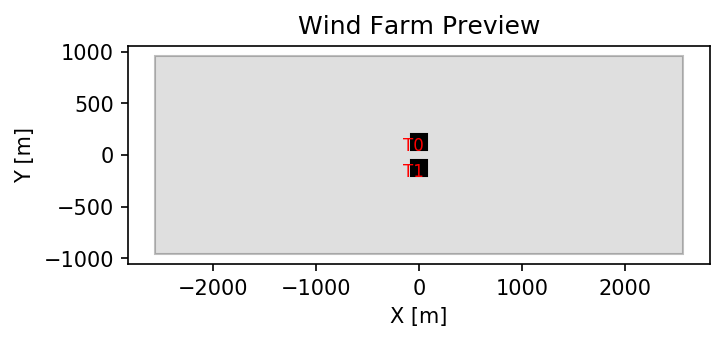

In [11]:
# Preview the turbine layout
fig, ax = plt.subplots(figsize=(5,5), facecolor='w', dpi=150)
case.turbines_previewAllTurbines(ax=ax)

In [12]:
# Now create the turbines
case.turbines_createAllTurbines()

# Print out existing list of turbines, just to confirm that the turbines got made
print(case.listboxpopupwindict['listboxactuator'].getitemlist())

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()
docopy = True from /projects/wind_uq/lcheung/amrwind-frontend/turbines/OpenFAST_NREL2p8-127 to T0_OpenFAST_NREL2p8-127
T0_OpenFAST_NREL2p8-127/NREL-2p8-127.fst
docopy = True from /projects/wind_uq/lcheung/amrwind-frontend/turbines/OpenFAST_NREL2p8-127 to T1_OpenFAST_NREL2p8-127
T1_OpenFAST_NREL2p8-127/NREL-2p8-127.fst
['T0', 'T1']


In [13]:
# Set some globals
case.setAMRWindInput('Actuator_TurbineFastDisk_density',       1.0,             forcechange=True)
case.setAMRWindInput('Actuator_TurbineFastDisk_epsilon',       [3.0, 3.0, 3.0], forcechange=True)
case.setAMRWindInput('Actuator_TurbineFastDisk_epsilon_tower', [3.0, 3.0, 3.0], forcechange=True)

## Add turbine refinement

In [14]:
refinementcsv="""
# CSV file should have columns with
# level, upstream, downstream, lateral, below, above, options
level, upstream, downstream, lateral, below, above, options
0,     10,       10,         3,       2,     2,     center:farm
1,     2.5,      2.5,        2.5,     1.2,   1.2,   center:farm
2,     1,        1,          0.75,    0.8,   0.8,  
"""
case.setAMRWindInput('refine_csvtextbox', refinementcsv)
case.setAMRWindInput('refine_deleteprev', True)

In [15]:
case.refine_createAllZones()
# Print out existing list of turbines
print(case.listboxpopupwindict['listboxtagging'].getitemlist())

['Farm_level_0_zone', 'Farm_level_1_zone', 'T0_level_2_zone', 'T1_level_2_zone']


Plotting turbines


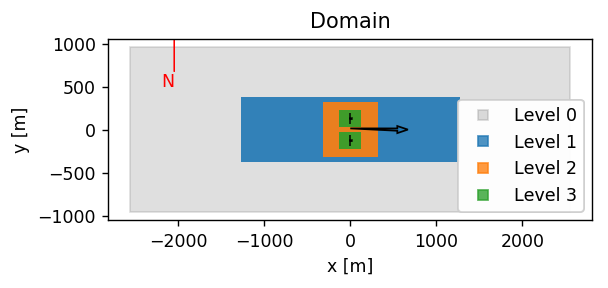

In [16]:
# Plot the domain
fig, ax2 = plt.subplots(figsize=(5,5), facecolor='w', dpi=125)
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.plotDomain(ax=ax2)
#ax.set_xlim([-3000,3000])

## Create sampling planes

In [17]:
samplingcsv="""
# CSV file should have columns withturbinescsv=
# name, type, upstream, downstream, lateral, below, above, n1, n2, options
name, type, upstream, downstream, lateral, below, above, n1, n2, options
#cl1, centerline, 1,  0, none, none,  none,  11, 11, none
#rp1, rotorplane, 2,  0, none, none,  none,  11, 11, none
#sw1, streamwise, 2,  1, 1, 0.5,  0.5,  11, 11, usedx:0.25 noffsets:1
hh,  hubheight,2560,2560,960, 0,  none,  11, 11, usedx:40 units:meter center:farm orientation:x
"""
case.setAMRWindInput('sampling_csvtextbox', samplingcsv)
case.setAMRWindInput('sampling_deleteprev', True)

In [18]:
case.sampling_createAllProbes(verbose=False)
# Print out existing list of turbines
print(case.listboxpopupwindict['listboxsampling'].getitemlist())

['Farm_hh']


Plotting turbines


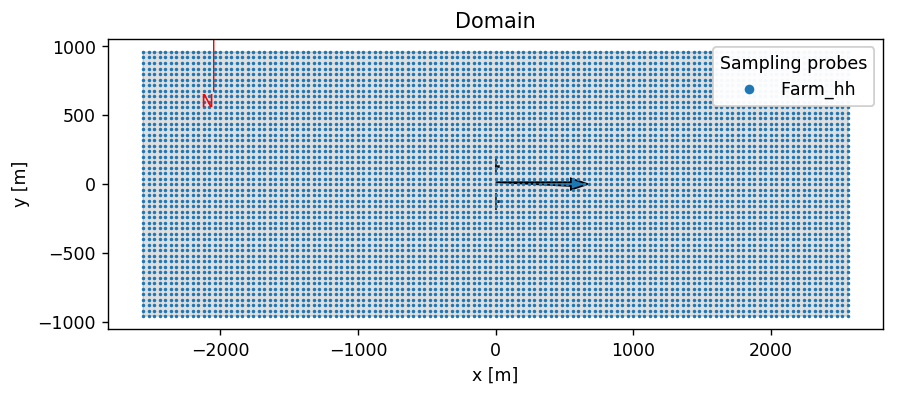

In [19]:
# Plot the domain
fig, ax = plt.subplots(figsize=(8,6), facecolor='w', dpi=125)
case.popup_storteddata['plotdomain']['plot_refineboxes']     = [] #case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = case.listboxpopupwindict['listboxsampling'].getitemlist()
case.plotDomain(ax=ax)

In [20]:
# Save the input file for this case
print(case.writeAMRWindInput('AMRWIND_ADM_NREL2p8_FarmSetup.inp'))

# --- Simulation time control parameters ---
time.stop_time                           = 360.0               # Max (simulated) time to evolve [s]
time.max_step                            = -1                  
time.fixed_dt                            = 0.1                 # Fixed timestep size (in seconds). If negative, then time.cfl is used
incflo.physics                           = FreeStream Actuator # List of physics models to include in simulation.
incflo.verbose                           = 0                   
io.check_file                            = chk                 
incflo.use_godunov                       = true                
incflo.godunov_type                      = ppm                 
turbulence.model                         = Laminar             
incflo.gravity                           = 0.0 0.0 -9.81       # Gravitational acceleration vector (x,y,z) [m/s^2]
incflo.density                           = 1.0                 # Fluid density [kg/m^3]
transport.viscosity 

In [21]:
# Save the farm setup yaml file
case.writeFarmSetupYAML('AMRWIND_ADM_NREL2p8_FarmSetup.yaml')

Saved farm setup to AMRWIND_ADM_NREL2p8_FarmSetup.yaml
